In [1]:
# !pip install imblearn

In [2]:
# !pip install hmmlearn

In [3]:
# pip install --upgrade scikit-learn

In [4]:
# !pip install pgmpy==0.1.15

In [33]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df.shape
df.astype(float)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [39]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [40]:
df=df.sample(n=100000,axis=0)

0    99820
1      180
Name: Class, dtype: int64

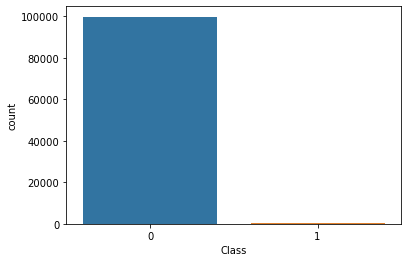

In [41]:
sns.countplot(x=df['Class'])
df["Class"].value_counts()

In [42]:
fraud = df[df["Class"] == 1]
non_fraud = df[df["Class"] == 0]

In [43]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0
mean,81071.994444,-4.407438,3.398606,-6.982965,4.528266,-3.096584,-1.479414,-5.116907,1.193363,-2.529385,...,0.471173,0.066334,-0.158625,-0.103788,0.071304,0.067269,0.247026,0.081483,140.179167,1.0
std,48431.182361,6.854081,4.197188,7.165907,2.767749,5.402050,1.594354,6.765256,4.684373,2.409987,...,2.084004,1.022558,1.548928,0.548295,0.842161,0.499949,1.328821,0.528141,297.276294,0.0
min,406.000000,-30.552380,-7.196980,-31.103685,-0.755458,-22.105532,-5.566870,-33.239328,-21.560039,-10.842526,...,-12.615023,-2.797150,-15.981649,-1.929717,-3.536716,-1.123534,-7.263482,-1.869290,0.000000,1.0
25%,41261.500000,-5.965123,1.098804,-7.977636,2.612672,-4.584753,-2.529378,-7.349370,-0.166764,-3.800528,...,-0.015778,-0.539103,-0.357905,-0.447406,-0.297749,-0.237690,0.007607,-0.043610,1.000000,1.0
50%,77010.500000,-1.966036,2.537079,-5.191314,4.213681,-1.526720,-1.345667,-2.764272,0.602649,-2.294228,...,0.602709,0.045894,-0.062458,-0.047819,0.157025,0.020388,0.402449,0.155683,18.975000,1.0
75%,126505.500000,0.010530,4.502118,-2.329563,6.059119,0.317456,-0.318177,-0.831064,1.574287,-0.893166,...,1.138504,0.601671,0.324055,0.321045,0.508160,0.423567,0.860980,0.366422,125.760000,1.0
max,170348.000000,2.091900,16.713389,1.199930,11.864868,11.095089,3.628382,5.431271,20.007208,3.353525,...,10.005998,5.774087,2.750221,1.091435,2.208209,2.745261,2.706566,1.773326,2125.870000,1.0


In [44]:
non_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,...,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.0
mean,94777.744881,0.007764,-0.014990,0.012325,-0.011483,0.005989,0.009607,0.006138,-0.000572,0.011349,...,-0.001139,-0.002972,0.000831,0.001580,-0.000093,0.001947,0.000889,0.000638,88.687573,0.0
std,47426.355936,1.947210,1.662375,1.461784,1.399397,1.391914,1.352119,1.213215,1.159696,1.088647,...,0.729927,0.723170,0.612141,0.608391,0.521649,0.483687,0.399965,0.350167,249.376454,0.0
min,1.000000,-56.407510,-72.715728,-48.325589,-5.600607,-113.743307,-26.160506,-22.518547,-50.943369,-6.105803,...,-22.665685,-8.555808,-26.751119,-2.814898,-7.495741,-1.855355,-9.895244,-15.430084,0.000000,0.0
25%,54322.000000,-0.917797,-0.603552,-0.887726,-0.849000,-0.693171,-0.762309,-0.553120,-0.206905,-0.635321,...,-0.228334,-0.544912,-0.161244,-0.353172,-0.317287,-0.326081,-0.071370,-0.052794,5.760000,0.0
50%,84641.000000,0.024498,0.060810,0.180177,-0.021783,-0.054961,-0.269069,0.036346,0.022930,-0.046767,...,-0.031708,0.003002,-0.011036,0.042442,0.019031,-0.049352,0.000812,0.011030,22.200000,0.0
75%,139251.500000,1.316884,0.793341,1.030170,0.728848,0.613239,0.407418,0.568383,0.327884,0.604782,...,0.183588,0.521911,0.148465,0.442065,0.350714,0.245183,0.089792,0.077799,77.900000,0.0
max,172788.000000,2.451888,18.183626,4.101716,16.491217,34.801666,73.301626,120.589494,18.709255,10.313974,...,22.599543,8.272233,22.528412,4.584549,5.473885,3.415636,31.612198,33.847808,25691.160000,0.0


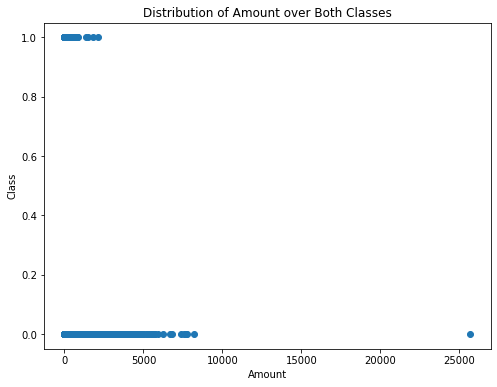

In [45]:
# Adding titles to the plots and axes
plt.rcParams["figure.figsize"] = "8,6"
plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

# Plotting the Amount column vs. Class Column
plt.scatter(df["Amount"],df["Class"])


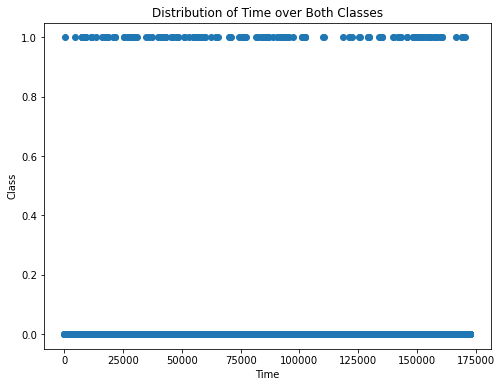

In [46]:
# Adding titles to the plots and axes
plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

# Plotting the Time column vs. Class Column
plt.scatter(df["Time"],df["Class"])

<AxesSubplot:>

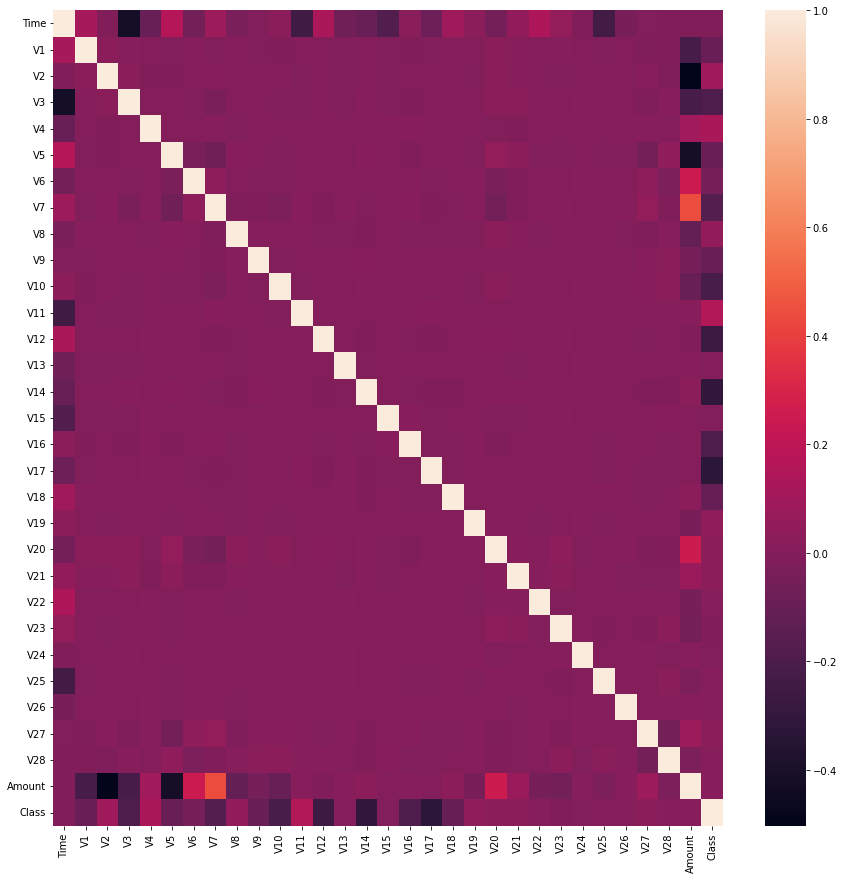

In [47]:
correlation = df.corr()
fig = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlation, vmax= 1 )


In [48]:
array = df.values
inf_indices = np.where(np.isinf(array))
nan_indices = np.where(np.isnan(array))
print(inf_indices, type(inf_indices))
print(nan_indices, type(nan_indices))
for row, col in zip(*inf_indices):
    array[row,col] = -1
    
for row, col in zip(*nan_indices):
    array[row,col] = 0
#array[]
X = array[:, 0:30]
y = array[:, 30]
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

validation_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
    test_size=validation_size, random_state=42)

(array([], dtype=int64), array([], dtype=int64)) <class 'tuple'>
(array([], dtype=int64), array([], dtype=int64)) <class 'tuple'>


In [49]:
X

array([[ 9.95300000e+04, -3.89152208e-01,  1.07486953e+00, ...,
         6.21079606e-02,  1.23456002e-01,  4.45000000e+00],
       [ 6.14170000e+04, -5.19302718e-01,  8.23157509e-01, ...,
         2.66463621e-01,  1.06007052e-01,  4.49000000e+00],
       [ 5.01780000e+04, -1.79273338e+00,  1.10997257e+00, ...,
         1.58830189e-01, -6.55810418e-04,  1.00000000e+00],
       ...,
       [ 1.68978000e+05, -1.23668594e+00,  1.33626421e+00, ...,
        -1.07687214e-02,  7.57792659e-03,  8.90000000e-01],
       [ 1.29521000e+05,  2.12900905e+00, -7.67292955e-01, ...,
        -1.91127097e-02, -4.32853531e-02,  2.29500000e+01],
       [ 9.78000000e+02, -9.83809893e-01,  4.79722158e-01, ...,
         6.98076746e-02,  5.85031497e-02,  2.26530000e+02]])

In [50]:
X_train.shape

(159712, 30)

In [51]:
y_train.shape

(159712,)

<AxesSubplot:ylabel='count'>

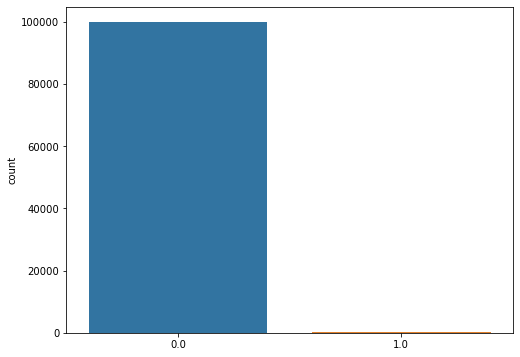

In [52]:
sns.countplot(x=y)

<AxesSubplot:ylabel='count'>

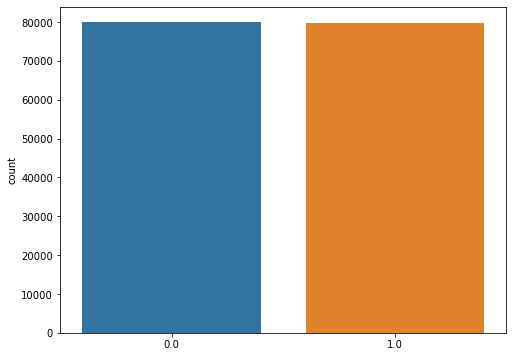

In [53]:
sns.countplot(x=y_train)

# Hidden Naive Bayes

In [74]:
param_grid = {'var_smoothing': [1e-19,1e-20]}

hidden_naive_bayes = GaussianNB()

grid_search = GridSearchCV(hidden_naive_bayes, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [75]:
y_pred = best_model.predict(X_test)

In [76]:
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 91.30935684231616
